In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
#reading the file
df = pd.read_csv(r"C:\Users\HP\Downloads\H2HBABBA1074.csv")

In [3]:
df.head()  #printing the top 5 elements

business_code cust_number      name_customer           clear_date  \
0          U001  0200762301  C&S WH foundation  2019-06-27 00:00:00   
1          U001   200707822           PUBLI co  2019-04-22 00:00:00   
2          U001  0200761734    H E BUT systems  2019-03-27 00:00:00   
3          U001  0200769623      WAL-MAR trust  2019-11-18 00:00:00   
4          U001  0200803720     DEC foundation                  NaN   

   buisness_year        doc_id posting_date  document_create_date  \
0         2019.0  1.929476e+09   2019-06-11              20190611   
1         2019.0  1.929098e+09   2019-04-07              20190407   
2         2019.0  1.928948e+09   2019-03-14              20190312   
3         2019.0  1.930114e+09   2019-11-07              20191106   
4         2020.0  1.930820e+09   2020-04-23              20200423   

   document_create_date.1  due_in_date invoice_currency document_type  \
0                20190611   20190626.0              USD            RV   
1                20190407   20190422.0              USD            RV   
2                20190314   20190329.0              USD            RV   
3                20191107   20191122.0              USD            RV   
4                20200423   20200509.0              USD            RV   

   posting_id  area_business  total_open_amount  baseline_create_date  \
0         1.0            NaN           28576.38            20190611.0   
1         1.0            NaN           92447.98            20190407.0   
2         1.0            NaN           14901.60            20190314.0   
3         1.0            NaN           50820.08            20191107.0   
4         1.0            NaN            1555.81            20200416.0   

  cust_payment_terms    invoice_id  isOpen  
0               NAC6  1.929476e+09       0  
1               NAA8  1.929098e+09       0  
2               NAA8  1.928948e+09       0  
3               NAH4  1.930114e+09       0  
4               NAM4  1.930820e+09       1

In [4]:
df.tail()    #printing the bottom 5 elements

business_code cust_number       name_customer           clear_date  \
49995          U001  0200769623         WAL-MAR llc  2019-12-02 00:00:00   
49996          U001  0200920735   ALBERT associates  2019-05-28 00:00:00   
49997          U001  0100004536              BAS co  2020-02-18 00:00:00   
49998          U001  0200705742            DOT corp  2020-03-13 00:00:00   
49999          CA02  0140104423  METRO  corporation  2019-12-19 00:00:00   

       buisness_year        doc_id posting_date  document_create_date  \
49995         2019.0  1.930170e+09   2019-11-20              20191120   
49996         2019.0  1.929008e+09   2019-03-23              20190322   
49997         2020.0  1.930468e+09   2020-02-03              20200202   
49998         2020.0  1.930559e+09   2020-02-22              20200222   
49999         2019.0  2.960599e+09   2019-12-07              20191207   

       document_create_date.1  due_in_date invoice_currency document_type  \
49995                20191120   20191205.0              USD            RV   
49996                20190323   20190527.0              USD            RV   
49997                20200203   20200218.0              USD            RV   
49998                20200222   20200325.0              USD            RV   
49999                20191207   20191220.0              CAD            RV   

       posting_id  area_business  total_open_amount  baseline_create_date  \
49995         1.0            NaN            4272.16            20191120.0   
49996         1.0            NaN            7055.28            20190323.0   
49997         1.0            NaN            1160.51            20200203.0   
49998         1.0            NaN            2333.54            20200222.0   
49999         1.0            NaN           74172.53            20191210.0   

      cust_payment_terms    invoice_id  isOpen  
49995               NAH4  1.930170e+09       0  
49996               NAGD  1.929008e+09       0  
49997               NAA8  1.930468e+09       0  
49998               NA32  1.930559e+09       0  
49999               CA10  2.960599e+09       0

In [5]:
df.shape  #Size of the dataframe("H2HBABBA1074")

(50000, 19)

# Splitting  of data into two parts based on null values

In [6]:
#splitting the dataframe based on clear date
main_test = df[df.clear_date.isnull()] #based on null values
main_train = df[df.clear_date.notnull()]   #baesd on not null values

In [7]:
main_train.shape,main_test.shape 

((40000, 19), (10000, 19))

# Data Preprocessing

In [8]:
main_train.isnull().sum() #printing the count of null 

business_code                 0
cust_number                   0
name_customer                 0
clear_date                    0
buisness_year                 0
doc_id                        0
posting_date                  0
document_create_date          0
document_create_date.1        0
due_in_date                   0
invoice_currency              0
document_type                 0
posting_id                    0
area_business             40000
total_open_amount             0
baseline_create_date          0
cust_payment_terms            0
invoice_id                    5
isOpen                        0
dtype: int64

In [9]:
main_train[main_train.invoice_id.isnull()] #checking the null values row based on  invoice id

business_code cust_number   name_customer           clear_date  \
9478           CA02  0100030194     AMAZO trust  2019-05-23 00:00:00   
11537          CA02  0100030194          AMAZO   2019-05-23 00:00:00   
24452          CA02  0140106054          TREE    2019-05-31 00:00:00   
42553          CA02  0140104409  LOB foundation  2019-05-08 00:00:00   
46612          CA02  0140104429       COSTCO co  2019-05-02 00:00:00   

       buisness_year        doc_id posting_date  document_create_date  \
9478          2019.0  9.500000e+09   2019-03-29              20190329   
11537         2019.0  9.500000e+09   2019-03-29              20190329   
24452         2019.0  9.500000e+09   2019-03-29              20190329   
42553         2019.0  9.500000e+09   2019-03-29              20190329   
46612         2019.0  9.500000e+09   2019-03-29              20190329   

       document_create_date.1  due_in_date invoice_currency document_type  \
9478                 20190311   20190321.0              CAD            X2   
11537                20190313   20190323.0              CAD            X2   
24452                20190313   20190323.0              CAD            X2   
42553                20190224   20190306.0              CAD            X2   
46612                20190227   20190309.0              CAD            X2   

       posting_id  area_business  total_open_amount  baseline_create_date  \
9478          1.0            NaN             649.35            20190311.0   
11537         1.0            NaN           16418.95            20190313.0   
24452         1.0            NaN            6739.20            20190313.0   
42553         1.0            NaN           16505.64            20190224.0   
46612         1.0            NaN           52992.00            20190227.0   

      cust_payment_terms  invoice_id  isOpen  
9478                CA10         NaN       0  
11537               CA10         NaN       0  
24452               CA10         NaN       0  
42553               CA10         NaN       0  
46612               CA10         NaN       0

In [10]:
#calculating the correlation between invoice id and  doc id 
correlation = pd.to_numeric(main_train['doc_id'].corr(main_train['invoice_id']))
print(correlation)

0.9999999999999998


In [11]:
# as invoice id is same as doc_id we can drop invoice id.
main_train.drop("invoice_id",axis=1,inplace=True)

In [12]:
# droppping the area business as it has completely null values
main_train.drop("area_business",axis=1,inplace=True)

In [13]:
main_train.nunique() #checking the unique vales in each column

business_code                 6
cust_number                1362
name_customer              3929
clear_date                  398
buisness_year                 2
doc_id                    39157
posting_date                424
document_create_date        428
document_create_date.1      424
due_in_date                 496
invoice_currency              2
document_type                 2
posting_id                    1
total_open_amount         35685
baseline_create_date        429
cust_payment_terms           67
isOpen                        1
dtype: int64

In [14]:
#changing the whole invoice currency into  USD currency

x = main_train[main_train['invoice_currency']=='CAD']['total_open_amount'].map(lambda x: x*0.81)    

for i in x.index:
    main_train['total_open_amount'][i] = 0.81*x[i]


main_train = main_train.drop(columns=['invoice_currency'])

In [15]:
#droping posting id as it have same values
main_train.drop("posting_id",axis=1,inplace=True)

In [16]:
 # changing data types 
main_train['buisness_year']=main_train.buisness_year.astype(int)
main_train['due_in_date']=main_train.due_in_date.astype(int)
main_train['baseline_create_date']=main_train.baseline_create_date.astype(int)    
main_train


business_code cust_number       name_customer           clear_date  \
0              U001  0200762301   C&S WH foundation  2019-06-27 00:00:00   
1              U001   200707822            PUBLI co  2019-04-22 00:00:00   
2              U001  0200761734     H E BUT systems  2019-03-27 00:00:00   
3              U001  0200769623       WAL-MAR trust  2019-11-18 00:00:00   
6              U001  0200711029         WEGMAN corp  2019-11-12 00:00:00   
...             ...         ...                 ...                  ...   
49995          U001  0200769623         WAL-MAR llc  2019-12-02 00:00:00   
49996          U001  0200920735   ALBERT associates  2019-05-28 00:00:00   
49997          U001  0100004536              BAS co  2020-02-18 00:00:00   
49998          U001  0200705742            DOT corp  2020-03-13 00:00:00   
49999          CA02  0140104423  METRO  corporation  2019-12-19 00:00:00   

       buisness_year        doc_id posting_date  document_create_date  \
0               2019  1.929476e+09   2019-06-11              20190611   
1               2019  1.929098e+09   2019-04-07              20190407   
2               2019  1.928948e+09   2019-03-14              20190312   
3               2019  1.930114e+09   2019-11-07              20191106   
6               2019  1.930036e+09   2019-10-20              20191021   
...              ...           ...          ...                   ...   
49995           2019  1.930170e+09   2019-11-20              20191120   
49996           2019  1.929008e+09   2019-03-23              20190322   
49997           2020  1.930468e+09   2020-02-03              20200202   
49998           2020  1.930559e+09   2020-02-22              20200222   
49999           2019  2.960599e+09   2019-12-07              20191207   

       document_create_date.1  due_in_date document_type  total_open_amount  \
0                    20190611     20190626            RV       28576.380000   
1                    20190407     20190422            RV       92447.980000   
2                    20190314     20190329            RV       14901.600000   
3                    20191107     20191122            RV       50820.080000   
6                    20191020     20191104            RV        7634.560000   
...                       ...          ...           ...                ...   
49995                20191120     20191205            RV        4272.160000   
49996                20190323     20190527            RV        7055.280000   
49997                20200203     20200218            RV        1160.510000   
49998                20200222     20200325            RV        2333.540000   
49999                20191207     20191220            RV       48664.596933   

       baseline_create_date cust_payment_terms  isOpen  
0                  20190611               NAC6       0  
1                  20190407               NAA8       0  
2                  20190314               NAA8       0  
3                  20191107               NAH4       0  
6                  20191020               NAA8       0  
...                     ...                ...     ...  
49995              20191120               NAH4       0  
49996              20190323               NAGD       0  
49997              20200203               NAA8       0  
49998              20200222               NA32       0  
49999              20191210               CA10       0  

[40000 rows x 15 columns]

In [17]:
#calculating the correlation between document_create_date and document_create_date.1
corr = pd.to_numeric(main_train['document_create_date'].corr(main_train['document_create_date.1']))
print(corr)

0.9884850416431942


In [18]:
#droping the document_create_date.1 due to corr is approx. equal to 1 with document_create_date
main_train.drop("document_create_date.1",axis=1,inplace=True)

In [19]:
#date-conversion
main_train['document_create_date'] = pd.to_datetime(main_train['document_create_date'],format = '%Y%m%d')
main_train['due_in_date'] = pd.to_datetime(main_train['due_in_date'],format = '%Y%m%d')
main_train["posting_date"] = pd.to_datetime(main_train.posting_date)
main_train['baseline_create_date'] = pd.to_datetime(main_train['baseline_create_date'],format = '%Y%m%d')
main_train["clear_date"] = pd.to_datetime(main_train.clear_date)

In [20]:
#droping the duplicate values.
main_train.drop_duplicates(subset=None, keep='first', inplace=True)

In [21]:
main_train.shape

(39157, 14)

In [22]:
#checking the value count for name_customer. 
main_train.name_customer.value_counts()

WAL-MAR trust            894
WAL-MAR associates       887
WAL-MAR systems          880
WAL-MAR corporation      880
WAL-MAR corp             872
                        ... 
MA llc                     1
MR. DAIRY corporation      1
MRS GR corp                1
PETER  co                  1
NATURA in                  1
Name: name_customer, Length: 3929, dtype: int64

In [23]:
#calculating delay
delay = main_train.clear_date - main_train.due_in_date
main_train['Delay'] = delay

In [24]:
#sorting the dataframe based on posting_date
main_train = main_train.sort_values(by="posting_date")

In [25]:
#converting the delay into numerical int
main_train['Delay'] = pd.to_numeric(main_train['Delay'].dt.days, downcast='integer')

In [26]:
main_train

business_code cust_number       name_customer clear_date  buisness_year  \
39658          U001      CCU013          KRAFT F co 2019-03-01           2019   
40923          U001  0200769623     WAL-MAR systems 2019-01-09           2019   
46201          U001  0200769623  WAL-MAR foundation 2019-01-10           2019   
48076          U001  0200762301        C&S WH trust 2019-01-15           2019   
21695          CA02  0140104340           COLABOR   2019-01-17           2019   
...             ...         ...                 ...        ...            ...   
30363          U001  0200700919              US  co 2020-03-20           2020   
8              U001  0200413833         LDC systems 2020-03-20           2020   
47413          U001  0200126819      MCLANE systems 2020-03-18           2020   
21512          CA02  0140106408       WAL-M systems 2020-03-16           2020   
32074          U001  0200794332          COST trust 2020-03-12           2020   

             doc_id posting_date document_create_date due_in_date  \
39658  1.928511e+09   2018-12-30           2018-12-31  2018-12-30   
40923  1.928542e+09   2018-12-30           2018-12-30  2019-01-14   
46201  1.928543e+09   2018-12-30           2018-12-30  2019-01-14   
48076  1.928542e+09   2018-12-30           2018-12-30  2019-01-14   
21695  2.960520e+09   2018-12-30           2018-12-30  2019-01-13   
...             ...          ...                  ...         ...   
30363  1.930580e+09   2020-02-27           2020-02-27  2020-03-18   
8      1.930559e+09   2020-02-27           2020-02-23  2020-03-13   
47413  1.930558e+09   2020-02-27           2020-02-22  2020-03-13   
21512  2.960614e+09   2020-02-27           2020-02-28  2020-03-10   
32074  1.930577e+09   2020-02-27           2020-02-27  2020-03-13   

      document_type  total_open_amount baseline_create_date  \
39658            RV        2557.020000           2018-12-30   
40923            RV        2686.330000           2018-12-30   
46201            RV       26130.420000           2018-12-30   
48076            RV      113804.920000           2018-12-30   
21695            RV       14310.144612           2019-01-03   
...             ...                ...                  ...   
30363            RV       90195.020000           2020-02-27   
8                RV       29832.090000           2020-02-27   
47413            RV       53264.580000           2020-02-27   
21512            RV       37840.068864           2020-02-29   
32074            RV       12610.490000           2020-02-27   

      cust_payment_terms  isOpen  Delay  
39658               NAX2       0     61  
40923               NAH4       0     -5  
46201               NAH4       0     -4  
48076               NAC6       0      1  
21695               CA10       0      4  
...                  ...     ...    ...  
30363               NAD1       0      2  
8                   NAA8       0      7  
47413               NAA8       0      5  
21512               CA10       0      6  
32074               NAAX       0     -1  

[39157 rows x 15 columns]

In [30]:
main_train.dtypes

business_code                   object
cust_number                     object
name_customer                   object
clear_date              datetime64[ns]
buisness_year                    int32
doc_id                         float64
posting_date            datetime64[ns]
document_create_date    datetime64[ns]
due_in_date             datetime64[ns]
document_type                   object
total_open_amount              float64
baseline_create_date    datetime64[ns]
cust_payment_terms              object
isOpen                           int64
Delay                            int16
dtype: object

# Splitting of main_data into 3 sets

In [31]:
#importing the sklearn module
from sklearn.model_selection import train_test_split

In [32]:
#droping the delay column and storing the dataframe in to X because delay is intermediate target column
X = main_train.drop(['Delay'],axis=1)

In [33]:
#storing the delay column in y
y = main_train['Delay']

In [34]:
#intermediate splitting to train and inter val_test
X_train,X_inter_test,y_train,y_inter_test = train_test_split(X,y,test_size=0.3,random_state=0,shuffle=False)

In [35]:
X_train.shape,X_inter_test.shape

((27409, 14), (11748, 14))

In [36]:
#final splliting inter val_test into val and test
X_val,X_test,y_val,y_test = train_test_split(X_inter_test,y_inter_test,test_size=0.5,random_state=0,shuffle=False)

In [37]:
#checking the shape of splitted data
X_train.shape,X_val.shape,X_test.shape

((27409, 14), (5874, 14), (5874, 14))

# Exploratory Data Analysis

In [38]:
#checking the delay column 

y_train

39658    61
40923    -5
46201    -4
48076     1
21695     4
         ..
6907      0
42809     0
29073     2
14537    -3
22230     4
Name: Delay, Length: 27409, dtype: int16

<AxesSubplot:xlabel='Delay', ylabel='Density'>

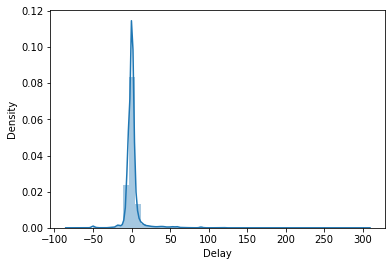

In [39]:
#ploting the distribution plot of delay column as it is intermediate target column
sns.distplot(y_train)

Most the payments are not delayed by customers.The graph is right-Skewed.
Outliers are there but they are not prominent.

<AxesSubplot:xlabel='Delay', ylabel='total_open_amount'>

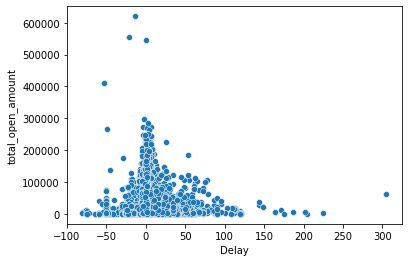

In [40]:
#ploting the scatter plot between delay and open_amount to check the delay based on open_amount

sns.scatterplot(data = X_train.merge(y_train,on=X_train.index),x='Delay',y='total_open_amount')

From this graph we can find these insights,the amount which is lower is paid on time and the amount which is huge is bit delayed while compared to lower amount

# Feature Engineering

In [41]:
X_train.dtypes #checking the data types to change the data types of every column

business_code                   object
cust_number                     object
name_customer                   object
clear_date              datetime64[ns]
buisness_year                    int32
doc_id                         float64
posting_date            datetime64[ns]
document_create_date    datetime64[ns]
due_in_date             datetime64[ns]
document_type                   object
total_open_amount              float64
baseline_create_date    datetime64[ns]
cust_payment_terms              object
isOpen                           int64
dtype: object

In [42]:
X_train

business_code cust_number       name_customer clear_date  buisness_year  \
39658          U001      CCU013          KRAFT F co 2019-03-01           2019   
40923          U001  0200769623     WAL-MAR systems 2019-01-09           2019   
46201          U001  0200769623  WAL-MAR foundation 2019-01-10           2019   
48076          U001  0200762301        C&S WH trust 2019-01-15           2019   
21695          CA02  0140104340           COLABOR   2019-01-17           2019   
...             ...         ...                 ...        ...            ...   
6907           U001  0200772595            SAFEW co 2019-10-24           2019   
42809          U001  0200152991      JET associates 2019-10-24           2019   
29073          U001  0200331749               SYSC  2019-11-12           2019   
14537          U001  0200769623     WAL-MAR systems 2019-10-21           2019   
22230          CA02  0140104440            SO trust 2019-10-31           2019   

             doc_id posting_date document_create_date due_in_date  \
39658  1.928511e+09   2018-12-30           2018-12-31  2018-12-30   
40923  1.928542e+09   2018-12-30           2018-12-30  2019-01-14   
46201  1.928543e+09   2018-12-30           2018-12-30  2019-01-14   
48076  1.928542e+09   2018-12-30           2018-12-30  2019-01-14   
21695  2.960520e+09   2018-12-30           2018-12-30  2019-01-13   
...             ...          ...                  ...         ...   
6907   1.929976e+09   2019-10-09           2019-10-07  2019-10-24   
42809  1.929995e+09   2019-10-09           2019-10-09  2019-10-24   
29073  1.929956e+09   2019-10-09           2019-10-02  2019-11-10   
14537  1.929987e+09   2019-10-09           2019-10-08  2019-10-24   
22230  2.960585e+09   2019-10-09           2019-10-09  2019-10-27   

      document_type  total_open_amount baseline_create_date  \
39658            RV        2557.020000           2018-12-30   
40923            RV        2686.330000           2018-12-30   
46201            RV       26130.420000           2018-12-30   
48076            RV      113804.920000           2018-12-30   
21695            RV       14310.144612           2019-01-03   
...             ...                ...                  ...   
6907             RV        8158.080000           2019-10-09   
42809            RV       16162.310000           2019-10-09   
29073            RV        5772.590000           2019-10-09   
14537            RV       24005.460000           2019-10-09   
22230            RV      196148.259612           2019-10-17   

      cust_payment_terms  isOpen  
39658               NAX2       0  
40923               NAH4       0  
46201               NAH4       0  
48076               NAC6       0  
21695               CA10       0  
...                  ...     ...  
6907                NAA8       0  
42809               NAA8       0  
29073               NA32       0  
14537               NAH4       0  
22230               CA10       0  

[27409 rows x 14 columns]

In [43]:
# Categorical value --> Label encoding
from sklearn.preprocessing import LabelEncoder

In [44]:
#doing Label Encoding 
#for changing the data type object to int
business_code_enc = LabelEncoder()
business_code_enc.fit(X_train['business_code'])
X_train['business_code_enc'] =business_code_enc.transform(X_train['business_code'])

In [45]:
#label encoding to validation and test sets
X_val['business_code_enc'] =business_code_enc.transform(X_val['business_code'])
X_test['business_code_enc'] =business_code_enc.transform(X_test['business_code'])

In [46]:
X_test[['business_code_enc','business_code']]

business_code_enc business_code
3915                   1          U001
13518                  0          CA02
22696                  1          U001
13593                  1          U001
9330                   1          U001
...                  ...           ...
30363                  1          U001
8                      1          U001
47413                  1          U001
21512                  0          CA02
32074                  1          U001

[5874 rows x 2 columns]

In [47]:
#doing label encoding 
from sklearn.preprocessing import LabelEncoder
document_type_enc = LabelEncoder()
document_type_enc.fit(X_train['document_type'])
X_train['document_type_enc'] =document_type_enc.transform(X_train['document_type'])
X_val['document_type_enc'] =document_type_enc.transform(X_val['document_type'])
X_test['document_type_enc'] =document_type_enc.transform(X_test['document_type'])


In [48]:
X_train.dtypes

business_code                   object
cust_number                     object
name_customer                   object
clear_date              datetime64[ns]
buisness_year                    int32
doc_id                         float64
posting_date            datetime64[ns]
document_create_date    datetime64[ns]
due_in_date             datetime64[ns]
document_type                   object
total_open_amount              float64
baseline_create_date    datetime64[ns]
cust_payment_terms              object
isOpen                           int64
business_code_enc                int32
document_type_enc                int32
dtype: object

### Time-date splitting

In [49]:
# document_create_date date splitting for train , val and test
X_train['doc_day']=X_train['document_create_date'].dt.day
X_val['doc_day']=X_val['document_create_date'].dt.day
X_test['doc_day']=X_test['document_create_date'].dt.day

X_train['doc_month']=X_train['document_create_date'].dt.month
X_val['doc_month']=X_val['document_create_date'].dt.month
X_test['doc_month']=X_test['document_create_date'].dt.month

X_train['doc_year']=X_train['document_create_date'].dt.year
X_val['doc_year']=X_val['document_create_date'].dt.year
X_test['doc_year']=X_test['document_create_date'].dt.year

In [50]:
#due_in_date date splitting for train , val and test
X_train['due_day']=X_train['due_in_date'].dt.day
X_val['due_day']=X_val['due_in_date'].dt.day
X_test['due_day']=X_test['due_in_date'].dt.day

X_train['due_month']=X_train['due_in_date'].dt.month
X_val['due_month']=X_val['due_in_date'].dt.month
X_test['due_month']=X_test['due_in_date'].dt.month

X_train['due_year']=X_train['due_in_date'].dt.year
X_val['due_year']=X_val['due_in_date'].dt.year
X_test['due_year']=X_test['due_in_date'].dt.year

In [51]:
# base_date date splitting for train , val and test
X_train['base_day']=X_train['baseline_create_date'].dt.day
X_val['base_day']=X_val['baseline_create_date'].dt.day
X_test['base_day']=X_test['baseline_create_date'].dt.day

X_train['base_month']=X_train['baseline_create_date'].dt.month
X_val['base_month']=X_val['baseline_create_date'].dt.month
X_test['base_month']=X_test['baseline_create_date'].dt.month

X_train['base_year']=X_train['baseline_create_date'].dt.year
X_val['base_year']=X_val['baseline_create_date'].dt.year
X_test['base_year']=X_test['baseline_create_date'].dt.year

In [52]:
# post_day date splitting for train , val and test
X_train['post_day']=X_train['posting_date'].dt.day
X_val['post_day']=X_val['posting_date'].dt.day
X_test['post_day']=X_test['posting_date'].dt.day

X_train['post_month']=X_train['posting_date'].dt.month
X_val['post_month']=X_val['posting_date'].dt.month
X_test['[post_month']=X_test['posting_date'].dt.month

X_train['post_year']=X_train['posting_date'].dt.year
X_val['post_year']=X_val['posting_date'].dt.year
X_test['post_year']=X_test['posting_date'].dt.year

In [53]:
#creating the function to drop the columns which are unnecessary in train , val and test.

def Thors_spark_drop(col,traindf = X_train,valdf = X_val,testdf = X_test):
    traindf.drop(col,inplace=True,axis=1)
    valdf.drop(col,inplace=True,axis=1)
    testdf.drop(col,inplace=True,axis=1)
    return traindf,valdf,testdf

In [54]:
#droping the columns using the function

X_train,X_val,X_test = Thors_spark_drop(['document_create_date'])
X_train,X_val,X_test = Thors_spark_drop(['due_in_date'])
X_train,X_val,X_test = Thors_spark_drop(['baseline_create_date'])
X_train,X_val,X_test = Thors_spark_drop(['posting_date'])
X_train,X_val,X_test = Thors_spark_drop(['document_type'])
X_train,X_val,X_test = Thors_spark_drop(['business_code'])




In [55]:
#splitting mixed data into numericals and strings.

mixed = "cust_payment_terms"
mixed_label = mixed + "_label"
mixed_num = mixed + "_numericals"
X_train[mixed_label] = X_train[mixed].str[:2]
X_train[mixed_num] =  X_train[mixed].str.extract('(\d+)')
X_val[mixed_label] = X_val[mixed].str[:2]
X_val[mixed_num] =  X_val[mixed].str.extract('(\d+)')
X_test[mixed_label] = X_test[mixed].str[:2]
X_test[mixed_num] =  X_test[mixed].str.extract('(\d+)')




In [56]:
#using the function to drop the cust_payment columns
X_train,X_val,X_test = Thors_spark_drop(['cust_payment_terms'])
X_train,X_val,X_test = Thors_spark_drop(['cust_payment_terms_label'])


In [57]:
#checking the null values for cust_payment_numericals in 3 sets of main_train. 
X_train[X_train.cust_payment_terms_numericals.isnull()]
X_val[X_val.cust_payment_terms_numericals.isnull()]
X_test[X_test.cust_payment_terms_numericals.isnull()]

cust_number     name_customer clear_date  buisness_year        doc_id  \
10392  0200794332   COST foundation 2019-12-27           2019  1.930255e+09   
38455  0200794332   COST foundation 2019-12-26           2019  1.930265e+09   
11793  0200794332        COST trust 2019-12-27           2019  1.930264e+09   
24787  0200794332  COST corporation 2019-12-26           2019  1.930257e+09   
31732  0200794332             COST  2019-12-27           2019  1.930265e+09   
...           ...               ...        ...            ...           ...   
14248  0200794332          COST llc 2020-03-11           2020  1.930566e+09   
2234   0200712102    SUGAR  systems 2020-05-12           2020  1.930571e+09   
49452  0100058365           REND co 2020-02-26           2020  1.991840e+09   
2000   0200794332           COST us 2020-03-12           2020  1.930566e+09   
32074  0200794332        COST trust 2020-03-12           2020  1.930577e+09   

       total_open_amount  isOpen  business_code_enc  document_type_enc  \
10392           13450.26       0                  1                  0   
38455           84505.37       0                  1                  0   
11793           16653.78       0                  1                  0   
24787           35029.57       0                  1                  0   
31732           61253.18       0                  1                  0   
...                  ...     ...                ...                ...   
14248           13012.94       0                  1                  0   
2234            40287.00       0                  1                  0   
49452           71060.43       0                  5                  0   
2000            51407.61       0                  1                  0   
32074           12610.49       0                  1                  0   

       doc_day  ...  due_day  due_month  due_year  base_day  base_month  \
10392        9  ...       26         12      2019        11          12   
38455       11  ...       26         12      2019        11          12   
11793       11  ...       26         12      2019        11          12   
24787       10  ...       26         12      2019        11          12   
31732       11  ...       27         12      2019        12          12   
...        ...  ...      ...        ...       ...       ...         ...   
14248       25  ...       12          3      2020        26           2   
2234        26  ...       26          4      2020        26           2   
49452       27  ...       27          3      2020        26           2   
2000        25  ...       12          3      2020        26           2   
32074       27  ...       13          3      2020        27           2   

       base_year  post_day  [post_month  post_year  \
10392       2019        11           12       2019   
38455       2019        11           12       2019   
11793       2019        11           12       2019   
24787       2019        11           12       2019   
31732       2019        12           12       2019   
...          ...       ...          ...        ...   
14248       2020        26            2       2020   
2234        2020        26            2       2020   
49452       2020        26            2       2020   
2000        2020        26            2       2020   
32074       2020        27            2       2020   

       cust_payment_terms_numericals  
10392                            NaN  
38455                            NaN  
11793                            NaN  
24787                            NaN  
31732                            NaN  
...                              ...  
14248                            NaN  
2234                             NaN  
49452                            NaN  
2000                             NaN  
32074                            NaN  

[381 rows x 22 columns]

In [58]:
#Filling the 0(zero) in NaN
X_val['cust_payment_terms_numericals'] = X_val['cust_payment_terms_numericals'].fillna(0)
X_train['cust_payment_terms_numericals'] = X_train['cust_payment_terms_numericals'].fillna(0)
X_test['cust_payment_terms_numericals'] = X_test['cust_payment_terms_numericals'].fillna(0)


In [59]:
#changing the datatype
X_train['cust_payment_terms_numericals']=X_train.cust_payment_terms_numericals.astype(int)
X_val['cust_payment_terms_numericals']=X_val.cust_payment_terms_numericals.astype(int)
X_test['cust_payment_terms_numericals']=X_test.cust_payment_terms_numericals.astype(int)

In [60]:
#using function droping the unwanted columns in data frame.
X_train,X_val,X_test = Thors_spark_drop(['name_customer'])
X_train,X_val,X_test = Thors_spark_drop(['cust_number'])

X_train,X_val,X_test = Thors_spark_drop(['clear_date'])

In [61]:
X_train.dtypes


buisness_year                      int32
doc_id                           float64
total_open_amount                float64
isOpen                             int64
business_code_enc                  int32
document_type_enc                  int32
doc_day                            int64
doc_month                          int64
doc_year                           int64
due_day                            int64
due_month                          int64
due_year                           int64
base_day                           int64
base_month                         int64
base_year                          int64
post_day                           int64
post_month                         int64
post_year                          int64
cust_payment_terms_numericals      int32
dtype: object

In [62]:
X_train

buisness_year        doc_id  total_open_amount  isOpen  \
39658           2019  1.928511e+09        2557.020000       0   
40923           2019  1.928542e+09        2686.330000       0   
46201           2019  1.928543e+09       26130.420000       0   
48076           2019  1.928542e+09      113804.920000       0   
21695           2019  2.960520e+09       14310.144612       0   
...              ...           ...                ...     ...   
6907            2019  1.929976e+09        8158.080000       0   
42809           2019  1.929995e+09       16162.310000       0   
29073           2019  1.929956e+09        5772.590000       0   
14537           2019  1.929987e+09       24005.460000       0   
22230           2019  2.960585e+09      196148.259612       0   

       business_code_enc  document_type_enc  doc_day  doc_month  doc_year  \
39658                  1                  0       31         12      2018   
40923                  1                  0       30         12      2018   
46201                  1                  0       30         12      2018   
48076                  1                  0       30         12      2018   
21695                  0                  0       30         12      2018   
...                  ...                ...      ...        ...       ...   
6907                   1                  0        7         10      2019   
42809                  1                  0        9         10      2019   
29073                  1                  0        2         10      2019   
14537                  1                  0        8         10      2019   
22230                  0                  0        9         10      2019   

       due_day  due_month  due_year  base_day  base_month  base_year  \
39658       30         12      2018        30          12       2018   
40923       14          1      2019        30          12       2018   
46201       14          1      2019        30          12       2018   
48076       14          1      2019        30          12       2018   
21695       13          1      2019         3           1       2019   
...        ...        ...       ...       ...         ...        ...   
6907        24         10      2019         9          10       2019   
42809       24         10      2019         9          10       2019   
29073       10         11      2019         9          10       2019   
14537       24         10      2019         9          10       2019   
22230       27         10      2019        17          10       2019   

       post_day  post_month  post_year  cust_payment_terms_numericals  
39658        30          12       2018                              2  
40923        30          12       2018                              4  
46201        30          12       2018                              4  
48076        30          12       2018                              6  
21695        30          12       2018                             10  
...         ...         ...        ...                            ...  
6907          9          10       2019                              8  
42809         9          10       2019                              8  
29073         9          10       2019                             32  
14537         9          10       2019                              4  
22230         9          10       2019                             10  

[27409 rows x 19 columns]

# Feature selection

<AxesSubplot:title={'center':'Correlation of Features in X_train'}>

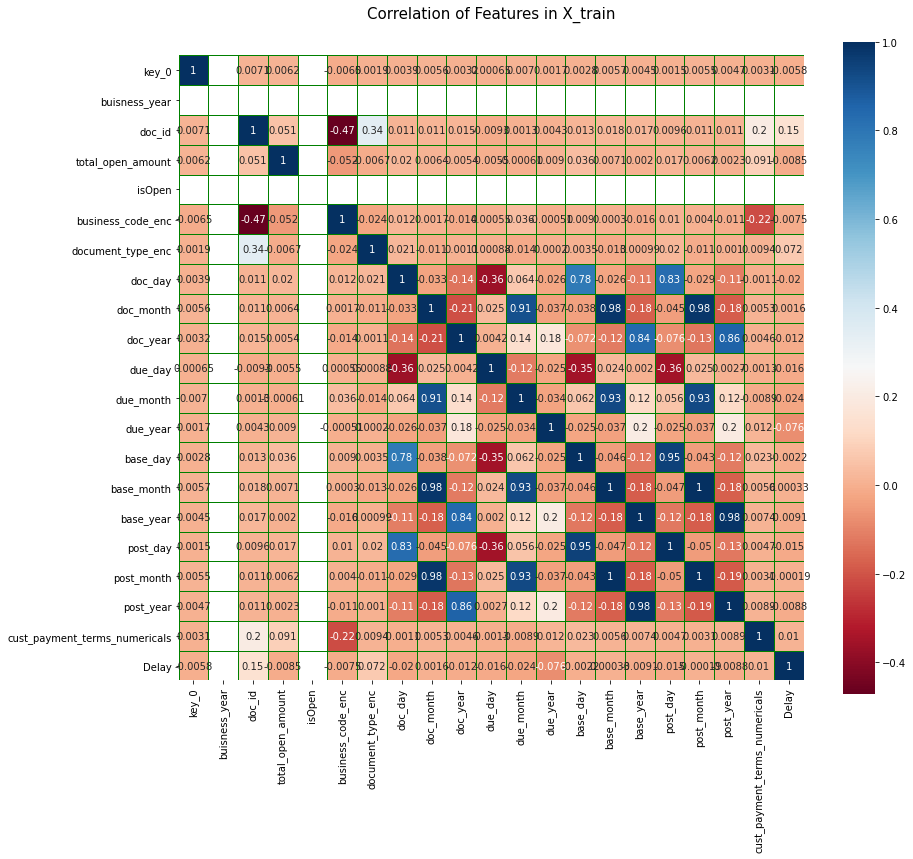

In [63]:
#ploting the heatmap to find the correlation among all columns to remove the unwanted columns
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Correlation of Features in X_train', y=1.05, size=15)
sns.heatmap(X_train.merge(y_train , on = X_train.index ).corr(),linewidths=1.0,vmax=1.0, 
            square=True, cmap=colormap, linecolor='green', annot=True)


In [64]:
#droping the unuseful columns (constant columns ) based on correlation found in heatmap
X_train,X_val,X_test = Thors_spark_drop(['isOpen'])
X_train,X_val,X_test = Thors_spark_drop(['buisness_year'])


In [65]:
X_train

doc_id  total_open_amount  business_code_enc  document_type_enc  \
39658  1.928511e+09        2557.020000                  1                  0   
40923  1.928542e+09        2686.330000                  1                  0   
46201  1.928543e+09       26130.420000                  1                  0   
48076  1.928542e+09      113804.920000                  1                  0   
21695  2.960520e+09       14310.144612                  0                  0   
...             ...                ...                ...                ...   
6907   1.929976e+09        8158.080000                  1                  0   
42809  1.929995e+09       16162.310000                  1                  0   
29073  1.929956e+09        5772.590000                  1                  0   
14537  1.929987e+09       24005.460000                  1                  0   
22230  2.960585e+09      196148.259612                  0                  0   

       doc_day  doc_month  doc_year  due_day  due_month  due_year  base_day  \
39658       31         12      2018       30         12      2018        30   
40923       30         12      2018       14          1      2019        30   
46201       30         12      2018       14          1      2019        30   
48076       30         12      2018       14          1      2019        30   
21695       30         12      2018       13          1      2019         3   
...        ...        ...       ...      ...        ...       ...       ...   
6907         7         10      2019       24         10      2019         9   
42809        9         10      2019       24         10      2019         9   
29073        2         10      2019       10         11      2019         9   
14537        8         10      2019       24         10      2019         9   
22230        9         10      2019       27         10      2019        17   

       base_month  base_year  post_day  post_month  post_year  \
39658          12       2018        30          12       2018   
40923          12       2018        30          12       2018   
46201          12       2018        30          12       2018   
48076          12       2018        30          12       2018   
21695           1       2019        30          12       2018   
...           ...        ...       ...         ...        ...   
6907           10       2019         9          10       2019   
42809          10       2019         9          10       2019   
29073          10       2019         9          10       2019   
14537          10       2019         9          10       2019   
22230          10       2019         9          10       2019   

       cust_payment_terms_numericals  
39658                              2  
40923                              4  
46201                              4  
48076                              6  
21695                             10  
...                              ...  
6907                               8  
42809                              8  
29073                             32  
14537                              4  
22230                             10  

[27409 rows x 17 columns]

In [66]:
#By giving the variancethreshold as 0.8 . It removes all features which variance doesn't meet 0.8 thershold. 
#calculating VarianceThreshold

from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(0.8)
sel.fit(X_train)


VarianceThreshold(threshold=0.8)

In [67]:
sel.variances_ #calculating mean for every column

array([8.89076858e+16, 1.27948850e+09, 3.15507736e-01, 1.82388555e-04,
       7.89036767e+01, 7.20629207e+00, 7.02786947e-03, 7.48547323e+01,
       7.24964476e+00, 2.18858279e-04, 8.03263867e+01, 7.18544840e+00,
       5.29834358e-03, 7.86867053e+01, 7.18138235e+00, 5.40661865e-03,
       2.75579175e+01])

In [68]:
X_train.info()
X_val.info()
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27409 entries, 39658 to 22230
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   doc_id                         27409 non-null  float64
 1   total_open_amount              27409 non-null  float64
 2   business_code_enc              27409 non-null  int32  
 3   document_type_enc              27409 non-null  int32  
 4   doc_day                        27409 non-null  int64  
 5   doc_month                      27409 non-null  int64  
 6   doc_year                       27409 non-null  int64  
 7   due_day                        27409 non-null  int64  
 8   due_month                      27409 non-null  int64  
 9   due_year                       27409 non-null  int64  
 10  base_day                       27409 non-null  int64  
 11  base_month                     27409 non-null  int64  
 12  base_year                      27409 non-n

# Model selection

In [69]:
#DecisiontreeRegressor based model for test

from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=0 , max_depth=5)

In [70]:
regressor.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5, random_state=0)

In [71]:
y_predict1 = regressor.predict(X_test)

In [72]:
#calculating mean_squared_error
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_predict1, squared=False)


8.841274981165943

In [73]:
#creating table on predicted and actuals
met1 = pd.DataFrame(zip(y_predict1 , y_test),columns=['Predicted','Actuals'])
met1

Predicted  Actuals
0      1.489074        1
1      4.925277        6
2     -2.058953       -5
3     -2.058953       -5
4     -2.058953       -5
...         ...      ...
5869  -0.960938        2
5870   1.489074        7
5871   1.489074        5
5872   4.925277        6
5873  -4.843333       -1

[5874 rows x 2 columns]

In [74]:
#DecisiontreeRegressor based model for val
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=0 , max_depth=5)

In [75]:
regressor.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5, random_state=0)

In [76]:
y_predict2 = regressor.predict(X_val)

In [77]:
#calculating mean_squared_error
from sklearn.metrics import mean_squared_error
mean_squared_error(y_val, y_predict2, squared=False)


6.308043244377671

In [78]:
#creating table on predicted and actuals
met2 = pd.DataFrame(zip(y_predict2 , y_val),columns=['Predicted','Actuals'])
met2

Predicted  Actuals
0      1.489074        0
1     -2.058953       -3
2     -2.058953        1
3     -3.551579        3
4     -4.843333      -32
...         ...      ...
5869   1.489074        2
5870   1.489074        1
5871   1.489074        1
5872   1.489074        2
5873  -2.058953       -2

[5874 rows x 2 columns]

In [79]:
#linear regression for test
from sklearn.linear_model import LinearRegression
base_model = LinearRegression()
base_model.fit(X_train, y_train)

LinearRegression()

In [80]:
y_predict3 = base_model.predict(X_test)

In [81]:
#calculating mean_squared_error
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_predict3, squared=False)


54.76945359074903

In [82]:
#creating table on predicted and actuals
met3 = pd.DataFrame(zip(y_predict3 , y_test),columns=['Predicted','Actuals'])
met3

Predicted  Actuals
0      0.670978        1
1      6.104566        6
2      1.480343       -5
3      0.857749       -5
4      0.867740       -5
...         ...      ...
5869 -58.471173        2
5870 -55.935845        7
5871 -55.828683        5
5872 -51.584020        6
5873 -56.531110       -1

[5874 rows x 2 columns]

In [83]:
#linear regression for val
from sklearn.linear_model import LinearRegression
base_model1 = LinearRegression()
base_model1.fit(X_train, y_train)

LinearRegression()

In [84]:
y_predict4 = base_model1.predict(X_val)

In [85]:
#calculating mean_squared_error
from sklearn.metrics import mean_squared_error
mean_squared_error(y_val, y_predict4, squared=False)

7.245621929524845

In [86]:
#calculating tables on predicted and actuals.
met4 = pd.DataFrame(zip(y_predict4 , y_val),columns=['Predicted','Actuals'])
met4

Predicted  Actuals
0      0.988448        0
1      1.347502       -3
2      1.290684        1
3     -3.868698        3
4     -4.963931      -32
...         ...      ...
5869   0.640552        2
5870   0.356707        1
5871  -0.442953        1
5872   0.559643        2
5873   1.182918       -2

[5874 rows x 2 columns]

In [87]:
#randomforestclassifier for test
from sklearn.ensemble import RandomForestClassifier

classifier1 = RandomForestClassifier()
classifier1.fit(X_train, y_train)


RandomForestClassifier()

In [88]:
y_predict5 = classifier1.predict(X_test)
y_predict5

array([ 0, 60, -3, ...,  1,  1,  0], dtype=int16)

In [89]:
#calculating mean_squared_error
mean_squared_error(y_test, y_predict5, squared=False)


9.336746664140774

In [90]:
#creating tables on predicted and actuals
met5 = pd.DataFrame(zip(y_predict5 , y_test),columns=['Predicted','Actuals'])
met5

Predicted  Actuals
0             0        1
1            60        6
2            -3       -5
3             1       -5
4            -3       -5
...         ...      ...
5869          1        2
5870          1        7
5871          1        5
5872          1        6
5873          0       -1

[5874 rows x 2 columns]

In [91]:
#randomforestclassifier for val
from sklearn.ensemble import RandomForestClassifier

classifier2 = RandomForestClassifier()
classifier2.fit(X_train, y_train)


RandomForestClassifier()

In [92]:
y_predict6 = classifier2.predict(X_val)
y_predict6

array([ 1, -3, -3, ...,  0,  0, -3], dtype=int16)

In [93]:
#calculting mean_squared_mean
mean_squared_error(y_val, y_predict6, squared=False)

7.7858750431320125

In [94]:
#creating tables on predicted and actuals
met6 = pd.DataFrame(zip(y_predict6 , y_val),columns=['Predicted','Actuals'])
met6

Predicted  Actuals
0             1        0
1            -3       -3
2            -3        1
3             5        3
4             1      -32
...         ...      ...
5869          0        2
5870          0        1
5871          0        1
5872          0        2
5873         -3       -2

[5874 rows x 2 columns]

In [95]:
X_train

doc_id  total_open_amount  business_code_enc  document_type_enc  \
39658  1.928511e+09        2557.020000                  1                  0   
40923  1.928542e+09        2686.330000                  1                  0   
46201  1.928543e+09       26130.420000                  1                  0   
48076  1.928542e+09      113804.920000                  1                  0   
21695  2.960520e+09       14310.144612                  0                  0   
...             ...                ...                ...                ...   
6907   1.929976e+09        8158.080000                  1                  0   
42809  1.929995e+09       16162.310000                  1                  0   
29073  1.929956e+09        5772.590000                  1                  0   
14537  1.929987e+09       24005.460000                  1                  0   
22230  2.960585e+09      196148.259612                  0                  0   

       doc_day  doc_month  doc_year  due_day  due_month  due_year  base_day  \
39658       31         12      2018       30         12      2018        30   
40923       30         12      2018       14          1      2019        30   
46201       30         12      2018       14          1      2019        30   
48076       30         12      2018       14          1      2019        30   
21695       30         12      2018       13          1      2019         3   
...        ...        ...       ...      ...        ...       ...       ...   
6907         7         10      2019       24         10      2019         9   
42809        9         10      2019       24         10      2019         9   
29073        2         10      2019       10         11      2019         9   
14537        8         10      2019       24         10      2019         9   
22230        9         10      2019       27         10      2019        17   

       base_month  base_year  post_day  post_month  post_year  \
39658          12       2018        30          12       2018   
40923          12       2018        30          12       2018   
46201          12       2018        30          12       2018   
48076          12       2018        30          12       2018   
21695           1       2019        30          12       2018   
...           ...        ...       ...         ...        ...   
6907           10       2019         9          10       2019   
42809          10       2019         9          10       2019   
29073          10       2019         9          10       2019   
14537          10       2019         9          10       2019   
22230          10       2019         9          10       2019   

       cust_payment_terms_numericals  
39658                              2  
40923                              4  
46201                              4  
48076                              6  
21695                             10  
...                              ...  
6907                               8  
42809                              8  
29073                             32  
14537                              4  
22230                             10  

[27409 rows x 17 columns]

# Predicting the clear date for main test

In [96]:
#main_test table
main_test

business_code cust_number       name_customer clear_date  buisness_year  \
4              U001  0200803720      DEC foundation        NaN         2020.0   
5              U001  0200726979         BJ'S  trust        NaN         2020.0   
7              U001  0200762301  C&S WH corporation        NaN         2020.0   
16             U001  0200762301  C&S WH corporation        NaN         2020.0   
17             U001  0200707822   PUBLI corporation        NaN         2020.0   
...             ...         ...                 ...        ...            ...   
49975          U001  0200794332        COST systems        NaN         2020.0   
49976          U001  0200726979           BJ'S  llc        NaN         2020.0   
49977          U001  0200772670    ASSOCIAT systems        NaN         2020.0   
49991          U001  0200754118     ARMY associates        NaN         2020.0   
49992          U001  0100044048             CJ  llc        NaN         2020.0   

             doc_id posting_date  document_create_date  \
4      1.930820e+09   2020-04-23              20200423   
5      1.930766e+09   2020-04-10              20200408   
7      1.930597e+09   2020-03-03              20200304   
16     1.930707e+09   2020-03-27              20200327   
17     1.930751e+09   2020-04-06              20200406   
...             ...          ...                   ...   
49975  1.930669e+09   2020-03-18              20200318   
49976  1.930780e+09   2020-04-12              20200413   
49977  1.930725e+09   2020-03-31              20200331   
49991  1.930811e+09   2020-04-22              20200422   
49992  1.930860e+09   2020-05-05              20200505   

       document_create_date.1  due_in_date invoice_currency document_type  \
4                    20200423   20200509.0              USD            RV   
5                    20200410   20200425.0              USD            RV   
7                    20200303   20200507.0              USD            RV   
16                   20200327   20200411.0              USD            RV   
17                   20200406   20200421.0              USD            RV   
...                       ...          ...              ...           ...   
49975                20200318   20200402.0              USD            RV   
49976                20200412   20200427.0              USD            RV   
49977                20200331   20200415.0              USD            RV   
49991                20200422   20200507.0              USD            RV   
49992                20200505   20200520.0              USD            RV   

       posting_id  area_business  total_open_amount  baseline_create_date  \
4             1.0            NaN            1555.81            20200416.0   
5             1.0            NaN           25173.31            20200410.0   
7             1.0            NaN           13422.38            20200303.0   
16            1.0            NaN          100264.17            20200327.0   
17            1.0            NaN           59395.42            20200406.0   
...           ...            ...                ...                   ...   
49975         1.0            NaN           44355.16            20200318.0   
49976         1.0            NaN            1361.10            20200412.0   
49977         1.0            NaN           54280.45            20200331.0   
49991         1.0            NaN            5556.60            20200422.0   
49992         1.0            NaN            3111.00            20200505.0   

      cust_payment_terms    invoice_id  isOpen  
4                   NAM4  1.930820e+09       1  
5                   NAA8  1.930766e+09       1  
7                   NAGD  1.930597e+09       1  
16                  NAC6  1.930707e+09       1  
17                  NAA8  1.930751e+09       1  
...                  ...           ...     ...  
49975               NAAX  1.930669e+09       1  
49976               NAA8  1.930780e+09       1  
49977               NAU5  1.930725e+09       

In [97]:
#checking null vales on main_test
main_test.isna().sum()

business_code                 0
cust_number                   0
name_customer                 0
clear_date                10000
buisness_year                 0
doc_id                        0
posting_date                  0
document_create_date          0
document_create_date.1        0
due_in_date                   0
invoice_currency              0
document_type                 0
posting_id                    0
area_business             10000
total_open_amount             0
baseline_create_date          0
cust_payment_terms            0
invoice_id                    0
isOpen                        0
dtype: int64

In [98]:
#dropping the clear_date  column
main_test = main_test.drop(['clear_date'],axis=1)

In [99]:
#dropping the area_business column
main_test = main_test.drop(['area_business'],axis=1)

In [100]:
#dropping the invoice_id column
main_test = main_test.drop(['invoice_id'],axis=1)

In [101]:
#dropping the posting_id column
main_test = main_test.drop(['posting_id'],axis=1)

In [102]:
#dropping the document_create_date.1 column
main_test = main_test.drop(['document_create_date.1'],axis=1)


In [103]:
#changing the invoice_currency on USD
x = main_test[main_test['invoice_currency']=='CAD']['total_open_amount'].map(lambda x: x*0.81)    

for i in x.index:
    main_test['total_open_amount'][i] = 0.81*x[i]

#dropping the invoice_currency column
main_test = main_test.drop(columns=['invoice_currency'])

In [104]:
# changing data types
main_test['buisness_year']=main_test.buisness_year.astype(int)
main_test['due_in_date']=main_test.due_in_date.astype(int)
main_test['baseline_create_date']=main_test.baseline_create_date.astype(int)     
main_test

business_code cust_number       name_customer  buisness_year  \
4              U001  0200803720      DEC foundation           2020   
5              U001  0200726979         BJ'S  trust           2020   
7              U001  0200762301  C&S WH corporation           2020   
16             U001  0200762301  C&S WH corporation           2020   
17             U001  0200707822   PUBLI corporation           2020   
...             ...         ...                 ...            ...   
49975          U001  0200794332        COST systems           2020   
49976          U001  0200726979           BJ'S  llc           2020   
49977          U001  0200772670    ASSOCIAT systems           2020   
49991          U001  0200754118     ARMY associates           2020   
49992          U001  0100044048             CJ  llc           2020   

             doc_id posting_date  document_create_date  due_in_date  \
4      1.930820e+09   2020-04-23              20200423     20200509   
5      1.930766e+09   2020-04-10              20200408     20200425   
7      1.930597e+09   2020-03-03              20200304     20200507   
16     1.930707e+09   2020-03-27              20200327     20200411   
17     1.930751e+09   2020-04-06              20200406     20200421   
...             ...          ...                   ...          ...   
49975  1.930669e+09   2020-03-18              20200318     20200402   
49976  1.930780e+09   2020-04-12              20200413     20200427   
49977  1.930725e+09   2020-03-31              20200331     20200415   
49991  1.930811e+09   2020-04-22              20200422     20200507   
49992  1.930860e+09   2020-05-05              20200505     20200520   

      document_type  total_open_amount  baseline_create_date  \
4                RV            1555.81              20200416   
5                RV           25173.31              20200410   
7                RV           13422.38              20200303   
16               RV          100264.17              20200327   
17               RV           59395.42              20200406   
...             ...                ...                   ...   
49975            RV           44355.16              20200318   
49976            RV            1361.10              20200412   
49977            RV           54280.45              20200331   
49991            RV            5556.60              20200422   
49992            RV            3111.00              20200505   

      cust_payment_terms  isOpen  
4                   NAM4       1  
5                   NAA8       1  
7                   NAGD       1  
16                  NAC6       1  
17                  NAA8       1  
...                  ...     ...  
49975               NAAX       1  
49976               NAA8       1  
49977               NAU5       1  
49991               NAA8       1  
49992               NAA8       1  

[10000 rows x 13 columns]

In [105]:
#changing into date-time conversion
main_test['document_create_date'] = pd.to_datetime(main_test['document_create_date'],format = '%Y%m%d')
main_test['due_in_date'] = pd.to_datetime(main_test['due_in_date'],format = '%Y%m%d')
main_test["posting_date"] = pd.to_datetime(main_test.posting_date)
main_test['baseline_create_date'] = pd.to_datetime(main_test['baseline_create_date'],format = '%Y%m%d')


In [106]:
#dropping the duplicate values
main_test.drop_duplicates(subset=None, keep='first', inplace=True)

In [107]:
#creating a delay column as NaN as it is a intermediate column
NaN = np.nan
main_test['delay'] = NaN

In [108]:
main_test

business_code cust_number       name_customer  buisness_year  \
4              U001  0200803720      DEC foundation           2020   
5              U001  0200726979         BJ'S  trust           2020   
7              U001  0200762301  C&S WH corporation           2020   
16             U001  0200762301  C&S WH corporation           2020   
17             U001  0200707822   PUBLI corporation           2020   
...             ...         ...                 ...            ...   
49975          U001  0200794332        COST systems           2020   
49976          U001  0200726979           BJ'S  llc           2020   
49977          U001  0200772670    ASSOCIAT systems           2020   
49991          U001  0200754118     ARMY associates           2020   
49992          U001  0100044048             CJ  llc           2020   

             doc_id posting_date document_create_date due_in_date  \
4      1.930820e+09   2020-04-23           2020-04-23  2020-05-09   
5      1.930766e+09   2020-04-10           2020-04-08  2020-04-25   
7      1.930597e+09   2020-03-03           2020-03-04  2020-05-07   
16     1.930707e+09   2020-03-27           2020-03-27  2020-04-11   
17     1.930751e+09   2020-04-06           2020-04-06  2020-04-21   
...             ...          ...                  ...         ...   
49975  1.930669e+09   2020-03-18           2020-03-18  2020-04-02   
49976  1.930780e+09   2020-04-12           2020-04-13  2020-04-27   
49977  1.930725e+09   2020-03-31           2020-03-31  2020-04-15   
49991  1.930811e+09   2020-04-22           2020-04-22  2020-05-07   
49992  1.930860e+09   2020-05-05           2020-05-05  2020-05-20   

      document_type  total_open_amount baseline_create_date  \
4                RV            1555.81           2020-04-16   
5                RV           25173.31           2020-04-10   
7                RV           13422.38           2020-03-03   
16               RV          100264.17           2020-03-27   
17               RV           59395.42           2020-04-06   
...             ...                ...                  ...   
49975            RV           44355.16           2020-03-18   
49976            RV            1361.10           2020-04-12   
49977            RV           54280.45           2020-03-31   
49991            RV            5556.60           2020-04-22   
49992            RV            3111.00           2020-05-05   

      cust_payment_terms  isOpen  delay  
4                   NAM4       1    NaN  
5                   NAA8       1    NaN  
7                   NAGD       1    NaN  
16                  NAC6       1    NaN  
17                  NAA8       1    NaN  
...                  ...     ...    ...  
49975               NAAX       1    NaN  
49976               NAA8       1    NaN  
49977               NAU5       1    NaN  
49991               NAA8       1    NaN  
49992               NAA8       1    NaN  

[9692 rows x 14 columns]

In [109]:
#dropping the delay column from main_test 
X = main_test.drop(['delay'],axis=1)

main_test.drop(['delay'],axis = 1,inplace = True)

In [110]:
X

business_code cust_number       name_customer  buisness_year  \
4              U001  0200803720      DEC foundation           2020   
5              U001  0200726979         BJ'S  trust           2020   
7              U001  0200762301  C&S WH corporation           2020   
16             U001  0200762301  C&S WH corporation           2020   
17             U001  0200707822   PUBLI corporation           2020   
...             ...         ...                 ...            ...   
49975          U001  0200794332        COST systems           2020   
49976          U001  0200726979           BJ'S  llc           2020   
49977          U001  0200772670    ASSOCIAT systems           2020   
49991          U001  0200754118     ARMY associates           2020   
49992          U001  0100044048             CJ  llc           2020   

             doc_id posting_date document_create_date due_in_date  \
4      1.930820e+09   2020-04-23           2020-04-23  2020-05-09   
5      1.930766e+09   2020-04-10           2020-04-08  2020-04-25   
7      1.930597e+09   2020-03-03           2020-03-04  2020-05-07   
16     1.930707e+09   2020-03-27           2020-03-27  2020-04-11   
17     1.930751e+09   2020-04-06           2020-04-06  2020-04-21   
...             ...          ...                  ...         ...   
49975  1.930669e+09   2020-03-18           2020-03-18  2020-04-02   
49976  1.930780e+09   2020-04-12           2020-04-13  2020-04-27   
49977  1.930725e+09   2020-03-31           2020-03-31  2020-04-15   
49991  1.930811e+09   2020-04-22           2020-04-22  2020-05-07   
49992  1.930860e+09   2020-05-05           2020-05-05  2020-05-20   

      document_type  total_open_amount baseline_create_date  \
4                RV            1555.81           2020-04-16   
5                RV           25173.31           2020-04-10   
7                RV           13422.38           2020-03-03   
16               RV          100264.17           2020-03-27   
17               RV           59395.42           2020-04-06   
...             ...                ...                  ...   
49975            RV           44355.16           2020-03-18   
49976            RV            1361.10           2020-04-12   
49977            RV           54280.45           2020-03-31   
49991            RV            5556.60           2020-04-22   
49992            RV            3111.00           2020-05-05   

      cust_payment_terms  isOpen  
4                   NAM4       1  
5                   NAA8       1  
7                   NAGD       1  
16                  NAC6       1  
17                  NAA8       1  
...                  ...     ...  
49975               NAAX       1  
49976               NAA8       1  
49977               NAU5       1  
49991               NAA8       1  
49992               NAA8       1  

[9692 rows x 13 columns]

In [111]:
#sorting the dataframe based on posting date 
X = X.sort_values(by="posting_date")

In [112]:
#doing the LabelEncoding
business_code_enc = LabelEncoder()
business_code_enc.fit(X['business_code'])
X['business_code_enc'] =business_code_enc.transform(X['business_code'])

In [113]:
#doing the LabelEncoding
document_type_enc = LabelEncoder()
document_type_enc.fit(X['document_type'])
X['document_type_enc'] =document_type_enc.transform(X['document_type'])

In [114]:
#spliting the data baesd on day , month , year.
X['doc_day']=X['document_create_date'].dt.day
X['doc_month']=X['document_create_date'].dt.month
X['doc_year']=X['document_create_date'].dt.year

X['base_day']=X['baseline_create_date'].dt.day
X['base_month']=X['baseline_create_date'].dt.month
X['base_year']=X['baseline_create_date'].dt.year

X['due_day']=X['due_in_date'].dt.day
X['due_month']=X['due_in_date'].dt.month
X['due_year']=X['due_in_date'].dt.year

X['post_day']=X['posting_date'].dt.day
X['post_month']=X['posting_date'].dt.month
X['post_year']=X['posting_date'].dt.year

In [115]:
#defining the function to drop unwanted column

def thors_spark_test_drop(col,testdf = X):
    testdf.drop(col,inplace=True,axis=1)
    return testdf

In [116]:
#dropiing columns using function

X =  thors_spark_test_drop(['business_code'])
X =  thors_spark_test_drop(['document_create_date'])
X =  thors_spark_test_drop(['document_type'])
X =  thors_spark_test_drop(['baseline_create_date'])
X =  thors_spark_test_drop(['posting_date'])
X =  thors_spark_test_drop(['due_in_date'])

In [117]:
#splitting the mixed values into numericals and strings
mixed = "cust_payment_terms"
mixed_label = mixed + "_label"
mixed_num = mixed + "_numericals"
X[mixed_label] = X[mixed].str[:2]
X[mixed_num] =  X[mixed].str.extract('(\d+)')

In [118]:
#dropping using the function which are mixed values
X = thors_spark_test_drop(['cust_payment_terms'])
X = thors_spark_test_drop(['cust_payment_terms_label'])

In [119]:
#filling the 0(zero) in null values.
X[X.cust_payment_terms_numericals.isnull()]
X['cust_payment_terms_numericals'] = X['cust_payment_terms_numericals'].fillna(0)

In [120]:
#changing the datatypes
X['cust_payment_terms_numericals']=X.cust_payment_terms_numericals.astype(int)

In [121]:
#dropping using the function which are not necessary due to having the doc_id as similarites
X = thors_spark_test_drop(['name_customer'])
X = thors_spark_test_drop(['cust_number'])

In [122]:
X.dtypes

buisness_year                      int32
doc_id                           float64
total_open_amount                float64
isOpen                             int64
business_code_enc                  int32
document_type_enc                  int32
doc_day                            int64
doc_month                          int64
doc_year                           int64
base_day                           int64
base_month                         int64
base_year                          int64
due_day                            int64
due_month                          int64
due_year                           int64
post_day                           int64
post_month                         int64
post_year                          int64
cust_payment_terms_numericals      int32
dtype: object

In [123]:
#dropping the columns which are constant
X = thors_spark_test_drop(['isOpen'])
X = thors_spark_test_drop(['buisness_year'])

In [124]:
#By giving the variancethreshold as 0.8 . It removes all features which variance doesn't meet 0.8 thershold. 
#calculating the VarianceThreshold
from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(0.8)
sel.fit(X)

VarianceThreshold(threshold=0.8)

In [125]:
sel.variances_ #calculating the mean

array([7.07384045e+16, 1.23344806e+09, 1.03623081e-01, 0.00000000e+00,
       8.57352630e+01, 5.35810218e-01, 0.00000000e+00, 8.68911001e+01,
       5.33022670e-01, 0.00000000e+00, 6.76353366e+01, 5.84100574e-01,
       0.00000000e+00, 8.49224584e+01, 5.29506350e-01, 0.00000000e+00,
       1.89698886e+01])

In [126]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9692 entries, 22319 to 5883
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   doc_id                         9692 non-null   float64
 1   total_open_amount              9692 non-null   float64
 2   business_code_enc              9692 non-null   int32  
 3   document_type_enc              9692 non-null   int32  
 4   doc_day                        9692 non-null   int64  
 5   doc_month                      9692 non-null   int64  
 6   doc_year                       9692 non-null   int64  
 7   base_day                       9692 non-null   int64  
 8   base_month                     9692 non-null   int64  
 9   base_year                      9692 non-null   int64  
 10  due_day                        9692 non-null   int64  
 11  due_month                      9692 non-null   int64  
 12  due_year                       9692 non-null

In [127]:
X

doc_id  total_open_amount  business_code_enc  document_type_enc  \
22319  1.991840e+09       33965.020000                  3                  0   
21122  1.930568e+09        9716.890000                  1                  0   
42876  1.930577e+09        2467.530000                  1                  0   
42068  2.960617e+09       42684.960582                  0                  0   
3568   1.930577e+09         242.070000                  1                  0   
...             ...                ...                ...                ...   
47031  1.930908e+09        6692.210000                  1                  0   
23216  1.930907e+09        9291.000000                  1                  0   
13612  1.930915e+09       20756.500000                  1                  0   
46792  1.930918e+09       27984.870000                  1                  0   
5883   1.991844e+09       50023.540000                  3                  0   

       doc_day  doc_month  doc_year  base_day  base_month  base_year  due_day  \
22319       27          2      2020        27           2       2020       28   
21122       25          2      2020        27           2       2020       13   
42876       27          2      2020        27           2       2020       13   
42068       27          2      2020         7           3       2020       17   
3568        27          2      2020        27           2       2020        2   
...        ...        ...       ...       ...         ...        ...      ...   
47031       15          5      2020        15           5       2020       30   
23216       16          5      2020        18           5       2020        2   
13612       18          5      2020        18           5       2020        2   
46792       19          5      2020        19           5       2020        3   
5883        20          5      2020        20           5       2020       19   

       due_month  due_year  post_day  post_month  post_year  \
22319          3      2020        27           2       2020   
21122          3      2020        27           2       2020   
42876          3      2020        27           2       2020   
42068          3      2020        27           2       2020   
3568           5      2020        27           2       2020   
...          ...       ...       ...         ...        ...   
47031          5      2020        15           5       2020   
23216          6      2020        18           5       2020   
13612          6      2020        18           5       2020   
46792          6      2020        19           5       2020   
5883           6      2020        20           5       2020   

       cust_payment_terms_numericals  
22319                              0  
21122                              8  
42876                              5  
42068                             10  
3568                               0  
...                              ...  
47031                              8  
23216                              8  
13612                              8  
46792                              8  
5883                               0  

[9692 rows x 17 columns]

## END RESULT

In [128]:
#doing prediction to X to predict the value 
final_result = regressor.predict(X)

In [129]:
final_result = pd.Series(final_result,name='delay')

In [130]:
# resetting the index of main test so that we can merge delay series with it
main_test.reset_index(drop=True,inplace=True)


In [131]:
Final = main_test.merge(final_result , on = X.index )
Final

key_0 business_code cust_number       name_customer  buisness_year  \
0     22319          U001  0200803720      DEC foundation           2020   
1     21122          U001  0200726979         BJ'S  trust           2020   
2     42876          U001  0200762301  C&S WH corporation           2020   
3     42068          U001  0200762301  C&S WH corporation           2020   
4      3568          U001  0200707822   PUBLI corporation           2020   
...     ...           ...         ...                 ...            ...   
9687  47031          U001  0200794332        COST systems           2020   
9688  23216          U001  0200726979           BJ'S  llc           2020   
9689  13612          U001  0200772670    ASSOCIAT systems           2020   
9690  46792          U001  0200754118     ARMY associates           2020   
9691   5883          U001  0100044048             CJ  llc           2020   

            doc_id posting_date document_create_date due_in_date  \
0     1.930820e+09   2020-04-23           2020-04-23  2020-05-09   
1     1.930766e+09   2020-04-10           2020-04-08  2020-04-25   
2     1.930597e+09   2020-03-03           2020-03-04  2020-05-07   
3     1.930707e+09   2020-03-27           2020-03-27  2020-04-11   
4     1.930751e+09   2020-04-06           2020-04-06  2020-04-21   
...            ...          ...                  ...         ...   
9687  1.930669e+09   2020-03-18           2020-03-18  2020-04-02   
9688  1.930780e+09   2020-04-12           2020-04-13  2020-04-27   
9689  1.930725e+09   2020-03-31           2020-03-31  2020-04-15   
9690  1.930811e+09   2020-04-22           2020-04-22  2020-05-07   
9691  1.930860e+09   2020-05-05           2020-05-05  2020-05-20   

     document_type  total_open_amount baseline_create_date cust_payment_terms  \
0               RV            1555.81           2020-04-16               NAM4   
1               RV           25173.31           2020-04-10               NAA8   
2               RV           13422.38           2020-03-03               NAGD   
3               RV          100264.17           2020-03-27               NAC6   
4               RV           59395.42           2020-04-06               NAA8   
...            ...                ...                  ...                ...   
9687            RV           44355.16           2020-03-18               NAAX   
9688            RV            1361.10           2020-04-12               NAA8   
9689            RV           54280.45           2020-03-31               NAU5   
9690            RV            5556.60           2020-04-22               NAA8   
9691            RV            3111.00           2020-05-05               NAA8   

      isOpen      delay  
0          1   4.925277  
1          1   1.489074  
2          1   1.489074  
3          1   4.925277  
4          1 -11.838710  
...      ...        ...  
9687       1   1.489074  
9688       1   1.489074  
9689       1   1.489074  
9690       1   1.489074  
9691       1   4.925277  

[9692 rows x 15 columns]

In [132]:
#converting the dealy into int format
Final['delay']=Final.delay.astype(int)
Final.dtypes


key_0                            int64
business_code                   object
cust_number                     object
name_customer                   object
buisness_year                    int32
doc_id                         float64
posting_date            datetime64[ns]
document_create_date    datetime64[ns]
due_in_date             datetime64[ns]
document_type                   object
total_open_amount              float64
baseline_create_date    datetime64[ns]
cust_payment_terms              object
isOpen                           int64
delay                            int32
dtype: object

In [133]:



Final

key_0 business_code cust_number       name_customer  buisness_year  \
0     22319          U001  0200803720      DEC foundation           2020   
1     21122          U001  0200726979         BJ'S  trust           2020   
2     42876          U001  0200762301  C&S WH corporation           2020   
3     42068          U001  0200762301  C&S WH corporation           2020   
4      3568          U001  0200707822   PUBLI corporation           2020   
...     ...           ...         ...                 ...            ...   
9687  47031          U001  0200794332        COST systems           2020   
9688  23216          U001  0200726979           BJ'S  llc           2020   
9689  13612          U001  0200772670    ASSOCIAT systems           2020   
9690  46792          U001  0200754118     ARMY associates           2020   
9691   5883          U001  0100044048             CJ  llc           2020   

            doc_id posting_date document_create_date due_in_date  \
0     1.930820e+09   2020-04-23           2020-04-23  2020-05-09   
1     1.930766e+09   2020-04-10           2020-04-08  2020-04-25   
2     1.930597e+09   2020-03-03           2020-03-04  2020-05-07   
3     1.930707e+09   2020-03-27           2020-03-27  2020-04-11   
4     1.930751e+09   2020-04-06           2020-04-06  2020-04-21   
...            ...          ...                  ...         ...   
9687  1.930669e+09   2020-03-18           2020-03-18  2020-04-02   
9688  1.930780e+09   2020-04-12           2020-04-13  2020-04-27   
9689  1.930725e+09   2020-03-31           2020-03-31  2020-04-15   
9690  1.930811e+09   2020-04-22           2020-04-22  2020-05-07   
9691  1.930860e+09   2020-05-05           2020-05-05  2020-05-20   

     document_type  total_open_amount baseline_create_date cust_payment_terms  \
0               RV            1555.81           2020-04-16               NAM4   
1               RV           25173.31           2020-04-10               NAA8   
2               RV           13422.38           2020-03-03               NAGD   
3               RV          100264.17           2020-03-27               NAC6   
4               RV           59395.42           2020-04-06               NAA8   
...            ...                ...                  ...                ...   
9687            RV           44355.16           2020-03-18               NAAX   
9688            RV            1361.10           2020-04-12               NAA8   
9689            RV           54280.45           2020-03-31               NAU5   
9690            RV            5556.60           2020-04-22               NAA8   
9691            RV            3111.00           2020-05-05               NAA8   

      isOpen  delay  
0          1      4  
1          1      1  
2          1      1  
3          1      4  
4          1    -11  
...      ...    ...  
9687       1      1  
9688       1      1  
9689       1      1  
9690       1      1  
9691       1      4  

[9692 rows x 15 columns]

In [134]:
Final.dtypes

key_0                            int64
business_code                   object
cust_number                     object
name_customer                   object
buisness_year                    int32
doc_id                         float64
posting_date            datetime64[ns]
document_create_date    datetime64[ns]
due_in_date             datetime64[ns]
document_type                   object
total_open_amount              float64
baseline_create_date    datetime64[ns]
cust_payment_terms              object
isOpen                           int64
delay                            int32
dtype: object

In [135]:
import datetime
import pandas as pd
Final['due_in_date'] = pd.to_datetime(Final['due_in_date'],format  = '%Y%m%d')
Final.dtypes

key_0                            int64
business_code                   object
cust_number                     object
name_customer                   object
buisness_year                    int32
doc_id                         float64
posting_date            datetime64[ns]
document_create_date    datetime64[ns]
due_in_date             datetime64[ns]
document_type                   object
total_open_amount              float64
baseline_create_date    datetime64[ns]
cust_payment_terms              object
isOpen                           int64
delay                            int32
dtype: object

In [136]:
#predictng the days of the delay column by creating ageing bucket

Final.loc[Final['delay']<15, 'bucket']= "0-15"
Final.loc[(Final['delay']>=15) & (Final['delay']<30),'bucket'] = "15-30"
Final.loc[(Final['delay']>=30) & (Final['delay']<45),'bucket'] = "30-45"
Final.loc[(Final['delay']>=45),'bucket'] = ">45"
       
Final['bucket'].value_counts()

0-15     9470
15-30     221
>45         1
Name: bucket, dtype: int64

In [137]:
#adding the due_in_date with delay to get the clear_date

Final['clear_date'] = Final['due_in_date'] + pd.to_timedelta(Final['delay'], unit='D')

In [138]:
#checking the final dataframe.
Final[['due_in_date', 'delay','clear_date']]


key_0 business_code cust_number       name_customer  buisness_year  \
0     22319          U001  0200803720      DEC foundation           2020   
1     21122          U001  0200726979         BJ'S  trust           2020   
2     42876          U001  0200762301  C&S WH corporation           2020   
3     42068          U001  0200762301  C&S WH corporation           2020   
4      3568          U001  0200707822   PUBLI corporation           2020   
...     ...           ...         ...                 ...            ...   
9687  47031          U001  0200794332        COST systems           2020   
9688  23216          U001  0200726979           BJ'S  llc           2020   
9689  13612          U001  0200772670    ASSOCIAT systems           2020   
9690  46792          U001  0200754118     ARMY associates           2020   
9691   5883          U001  0100044048             CJ  llc           2020   

            doc_id posting_date document_create_date due_in_date  \
0     1.930820e+09   2020-04-23           2020-04-23  2020-05-09   
1     1.930766e+09   2020-04-10           2020-04-08  2020-04-25   
2     1.930597e+09   2020-03-03           2020-03-04  2020-05-07   
3     1.930707e+09   2020-03-27           2020-03-27  2020-04-11   
4     1.930751e+09   2020-04-06           2020-04-06  2020-04-21   
...            ...          ...                  ...         ...   
9687  1.930669e+09   2020-03-18           2020-03-18  2020-04-02   
9688  1.930780e+09   2020-04-12           2020-04-13  2020-04-27   
9689  1.930725e+09   2020-03-31           2020-03-31  2020-04-15   
9690  1.930811e+09   2020-04-22           2020-04-22  2020-05-07   
9691  1.930860e+09   2020-05-05           2020-05-05  2020-05-20   

     document_type  total_open_amount baseline_create_date cust_payment_terms  \
0               RV            1555.81           2020-04-16               NAM4   
1               RV           25173.31           2020-04-10               NAA8   
2               RV           13422.38           2020-03-03               NAGD   
3               RV          100264.17           2020-03-27               NAC6   
4               RV           59395.42           2020-04-06               NAA8   
...            ...                ...                  ...                ...   
9687            RV           44355.16           2020-03-18               NAAX   
9688            RV            1361.10           2020-04-12               NAA8   
9689            RV           54280.45           2020-03-31               NAU5   
9690            RV            5556.60           2020-04-22               NAA8   
9691            RV            3111.00           2020-05-05               NAA8   

      isOpen  delay bucket clear_date  
0          1      4   0-15 2020-05-13  
1          1      1   0-15 2020-04-26  
2          1      1   0-15 2020-05-08  
3          1      4   0-15 2020-04-15  
4          1    -11   0-15 2020-04-10  
...      ...    ...    ...        ...  
9687       1      1   0-15 2020-04-03  
9688       1      1   0-15 2020-04-28  
9689       1      1   0-15 2020-04-16  
9690       1      1   0-15 2020-05-08  
9691       1      4   0-15 2020-05-24  

[9692 rows x 17 columns]

In [140]:
#final table
Final

due_in_date  delay clear_date
0     2020-05-09      4 2020-05-13
1     2020-04-25      1 2020-04-26
2     2020-05-07      1 2020-05-08
3     2020-04-11      4 2020-04-15
4     2020-04-21    -11 2020-04-10
...          ...    ...        ...
9687  2020-04-02      1 2020-04-03
9688  2020-04-27      1 2020-04-28
9689  2020-04-15      1 2020-04-16
9690  2020-05-07      1 2020-05-08
9691  2020-05-20      4 2020-05-24

[9692 rows x 3 columns]